# MNIST with CNN

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

In [0]:
# input image dimensions
img_rows, img_cols = 28, 28
input_shape = (img_rows, img_cols, 1)
num_classes = 10

In [0]:
# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [22]:
print('x_train shape:', x_train.shape)

x_train shape: (60000, 28, 28)


In [23]:
# The color is encoded as a number from 0 to 255
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [24]:
# Keras wants the picture not in a 3D tensor but in a 4D tensor
# first dimension is the different pictures
# second and third dimensions are the 28x28 x and y axis of the picture
# fourth dimension: Color channel (we only have one color (gray))
# reshape train and test data to 4D tensor
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
print('x_train shape:', x_train.shape)

x_train shape: (60000, 28, 28, 1)


In [25]:
# gray scale is encodes an integer between 0 to 255
# the neural network needs at as a float
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# We rescale the tensor so that the numbers are between 0 and 1
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

60000 train samples
10000 test samples


true class: 4


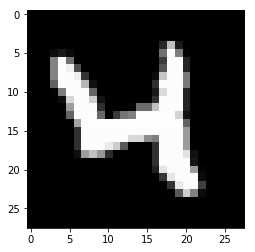

In [26]:
# Let us us look at an example
img_index = 20
print("true class:", y_train[img_index])
plt.imshow(np.reshape(x_train[img_index],(28,28)),cmap='gray')

In [0]:
# convert class vectors to one-hot endoded binary class matrices
# TODO
from keras.utils import np_utils
number_of_classes = 10
y_train = np_utils.to_categorical(y_train, number_of_classes)
y_test = np_utils.to_categorical(y_test, number_of_classes)

true class: [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


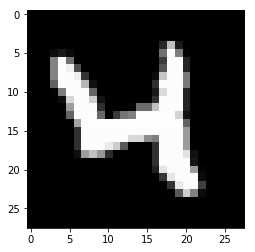

In [32]:
# Show the image 20 with the true class
img_index = 20
print("true class:", y_train[img_index])
plt.imshow(np.reshape(x_train[img_index],(28,28)),cmap='gray')

In [34]:
# Create a Sequential Model
# Add a Convolutional Layer with the 32 Kernels, each with the size 3x3, user Relu as the activation function, and define the input shape
# Add another Convolutional Layer with the 64 Kernels, each with the size 3x3, user Relu as the activation function
# Add a Max Pooling Layer with pool size of 2x2
# Add then a Dropout of 25%
# Add then a Flatten Operator to get a one dimensional vector
# Add a dense layer with 128 node and Relu activation
# Add then a Dropout of 50%
# Finally add a dense layer for the output. Think about the number of nodes and the activation function you need
# TODO
# create model
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(x_train.shape[1], x_train.shape[2], 1), activation='relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(number_of_classes, activation='softmax'))

W0617 18:05:33.908627 140265109944192 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0617 18:05:33.921133 140265109944192 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0617 18:05:33.971372 140265109944192 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0617 18:05:33.978541 140265109944192 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0617 18:05:33.989358 140265109944192 de

In [36]:
# Compile the model
# Think about the appropiate loss function
# Use as the Optimizer Adadelta
# Add as another metric Accuracy
# TODO
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

W0617 18:06:12.211903 140265109944192 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0617 18:06:12.252523 140265109944192 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [42]:
# Fit the model
# save the learning history in a variable history
# use batch size 128, and 12 epochs
# TODO
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=12, batch_size=128)

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 5s 78us/step - loss: 0.0179 - acc: 0.9940 - val_loss: 0.0308 - val_acc: 0.9920
Epoch 2/12
60000/60000 [==============================] - 5s 76us/step - loss: 0.0171 - acc: 0.9943 - val_loss: 0.0270 - val_acc: 0.9930
Epoch 3/12
60000/60000 [==============================] - 5s 76us/step - loss: 0.0168 - acc: 0.9944 - val_loss: 0.0313 - val_acc: 0.9922
Epoch 4/12
60000/60000 [==============================] - 5s 76us/step - loss: 0.0160 - acc: 0.9948 - val_loss: 0.0310 - val_acc: 0.9930
Epoch 5/12
60000/60000 [==============================] - 5s 77us/step - loss: 0.0154 - acc: 0.9946 - val_loss: 0.0283 - val_acc: 0.9933
Epoch 6/12
60000/60000 [==============================] - 5s 77us/step - loss: 0.0145 - acc: 0.9954 - val_loss: 0.0340 - val_acc: 0.9922
Epoch 7/12
60000/60000 [==============================] - 5s 77us/step - loss: 0.0131 - acc: 0.9953 - val_loss: 0.0310 - val_acc

In [43]:
# Test the model based on the test data
# Print the Test loss and the test accuracy
# TODO
metrics = model.evaluate(x_test, y_test, verbose=0)
print("Metrics(Test loss & Test Accuracy): ")
print(metrics)

Metrics(Test loss & Test Accuracy): 
[0.030833957539281982, 0.993]


In [44]:
# list all data in history
print(history.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


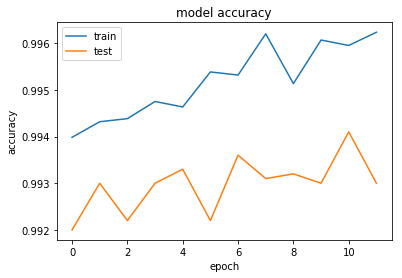

In [59]:
# Create a plot to show Training and Validation Accuracy
# TODO
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

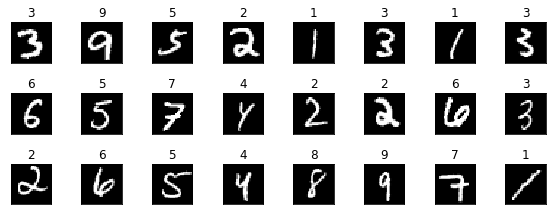

In [50]:
# Shows Test Pictures and predicted class
grid_x = 8
grid_y = 3
plt.figure(figsize=(1*grid_x, 2*grid_y))
for y in range(grid_y):
    for x in range(grid_x):
        index = x + (grid_x * y)
        plt_index = x + (grid_x * y)
        plt.subplot(2*grid_y, grid_x, 1+plt_index)
        img_index = index+500
        pred_data = np.reshape(x_test[img_index], (1, 28, 28, 1))
        pred = model.predict(pred_data, verbose=0)
        plt.imshow(np.reshape(x_test[img_index],(28,28)),cmap='gray')
        plt.xticks([],[])
        plt.yticks([],[])
        plt.title(str(np.argmax(pred)))
plt.tight_layout()
plt.show()

In [54]:
# Show a Model Summary
# TODO
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
__________